In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datacat4ml.Scripts.const import ML_DIR, Pipelines, rmvSs
from datacat4ml.Scripts.data_prep.data_split.alnSplit_mldata import alignment_map, get_pd_cd_pairs, get_pfp_cfps_all

/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Utility functions

In [2]:
def create_sub_df(df, **kwargs):
    """
    filter the dataframe based on the given conditions for any combination of the columns
    """
    sub_df = df.copy()

    for col_name, value in kwargs.items():
        if value is not None:
            if isinstance(value, list):
                sub_df = sub_df[sub_df[col_name].isin(value)].reset_index(drop=True)
            else:
                sub_df = sub_df[sub_df[col_name] == value].reset_index(drop=True)

    return sub_df

# Read the result csv file

In [3]:
# concatenate all csv file in directory ML_DIR
result_df = pd.concat(
    [pd.read_csv(os.path.join(ML_DIR, f))
     for f in os.listdir(ML_DIR)
     if f.endswith(".csv")
    ],
    ignore_index=True
) 

print(f'The shape of result_df is {result_df.shape}')
print(f'The columns of result_df: \n{result_df.columns}')
result_df

The shape of result_df is (3620, 42)
The columns of result_df: 
Index(['algo', 'pd_cat_level', 'cd_cat_level', 'rmvD', 'pf_prefix',
       'pf_target_chembl_id', 'pf_effect', 'pf_assay', 'pf_standard_type',
       'pf_assay_chembl_id', 'cf_prefix', 'cf_target_chembl_id', 'cf_effect',
       'cf_assay', 'cf_standard_type', 'cf_assay_chembl_id', 'descriptor',
       'SPL', 'aim', 'spl', 'rmvS', 'pf_ds_size', 'pf_ds_size_level',
       'pf_threshold', 'pf_percent_a', 'pf_aln_outer_n_fold', 'cf_ds_size',
       'cf_ds_size_level', 'cf_threshold', 'cf_percent_a',
       'cf_aln_outer_n_fold', 'pipeline', 'pf_auroc', 'pf_auprc',
       'pf_balanced', 'pf_kappa', 'pf_bedroc', 'cf_auroc', 'cf_auprc',
       'cf_balanced', 'cf_kappa', 'cf_bedroc'],
      dtype='object')


,algo,pd_cat_level,cd_cat_level,rmvD,pf_prefix,pf_target_chembl_id,pf_effect,pf_assay,pf_standard_type,pf_assay_chembl_id,...,pf_auroc,pf_auprc,pf_balanced,pf_kappa,pf_bedroc,cf_auroc,cf_auprc,cf_balanced,cf_kappa,cf_bedroc
0,RF,hhd,mhd,1,CHEMBL233_None_None_Ki_None_hhd,CHEMBL233,NaN,NaN,Ki,NaN,...,0.720000,0.945449,0.500000,0.000000,1.000000e+00,0.655000,0.944798,0.500000,0.000000,1.000000
1,RF,hhd,mhd,1,CHEMBL233_None_None_Ki_None_hhd,CHEMBL233,NaN,NaN,Ki,NaN,...,0.688826,0.924344,0.499822,-0.000649,9.548447e-01,0.694842,0.924968,0.500572,0.001629,0.962046
2,RF,hhd,mhd,1,CHEMBL236_None_None_IC50_None_hhd,CHEMBL236,NaN,NaN,IC50,NaN,...,0.732012,0.805443,0.533909,0.078027,9.740993e-01,0.674862,0.769388,0.556285,0.064828,0.934101
3,RF,hhd,mhd,1,CHEMBL236_None_None_IC50_None_hhd,CHEMBL236,NaN,NaN,IC50,NaN,...,0.782986,0.782101,0.715278,0.453271,9.990217e-01,0.788434,0.790025,0.500000,0.000000,0.977435
4,RF,hhd,mhd,1,CHEMBL233_None_None_IC50_None_hhd,CHEMBL233,NaN,NaN,IC50,NaN,...,0.208333,0.509265,0.541667,0.014925,5.000000e-01,0.750000,0.916190,0.500000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3615,RF,mhd,lhd,1,CHEMBL236_bind_RBA_Ki_None_mhd,CHEMBL236,bind,RBA,Ki,NaN,...,0.644167,0.555671,0.623333,0.249472,6.000000e-01,0.680667,0.664771,0.653333,0.307808,0.600138
3616,RF,mhd,lhd,1,CHEMBL236_bind_RBA_Ki_None_mhd,CHEMBL236,bind,RBA,Ki,NaN,...,0.615385,0.083333,0.500000,0.000000,3.266131e-13,0.765669,0.788308,0.691905,0.383259,0.999624
3617,RF,mhd,lhd,1,CHEMBL2014_bind_RBA_Ki_None_mhd,CHEMBL2014,bind,RBA,Ki,NaN,...,0.775000,0.959315,0.500000,0.000000,1.000000e+00,0.877778,0.982208,0.500000,0.000000,1.000000
3618,RF,mhd,lhd,1,CHEMBL2014_bind_RBA_Ki_None_mhd,CHEMBL2014,bind,RBA,Ki,NaN,...,0.758333,0.896026,0.638889,0.326916,8.001326e-01,0.774259,0.922035,0.588889,0.221552,0.999867


# Histplot

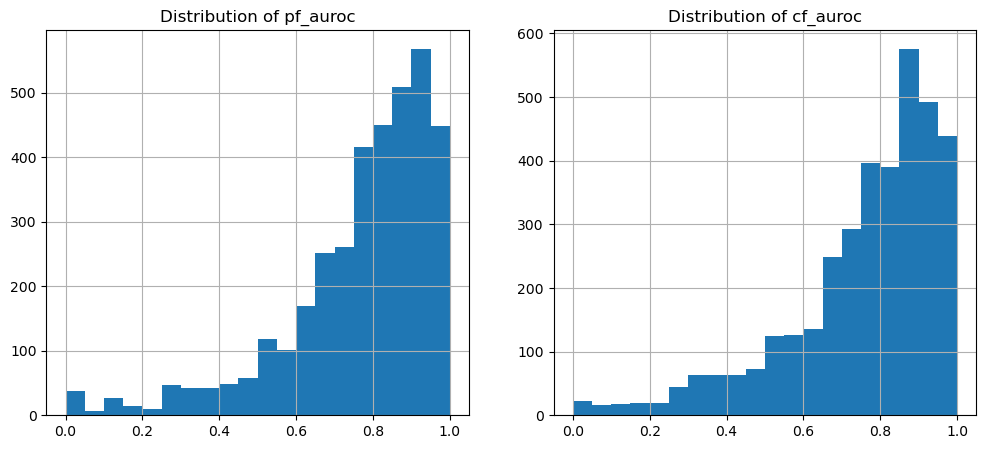

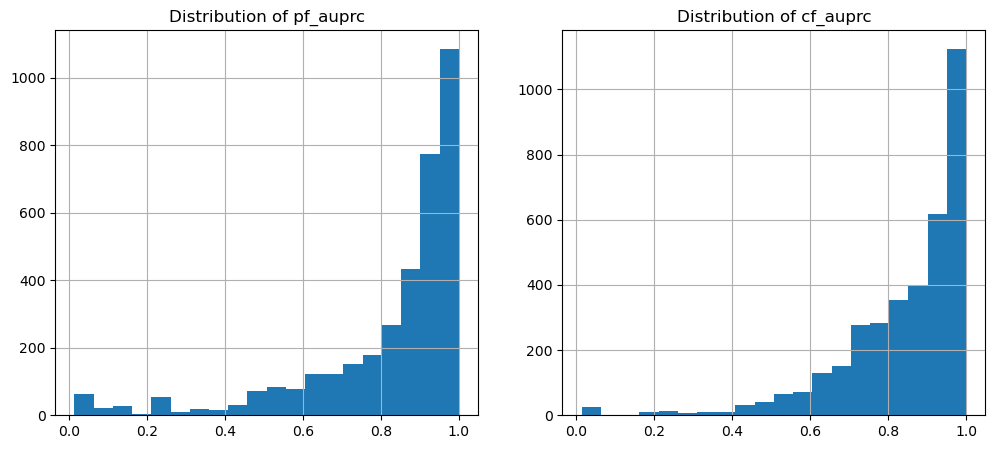

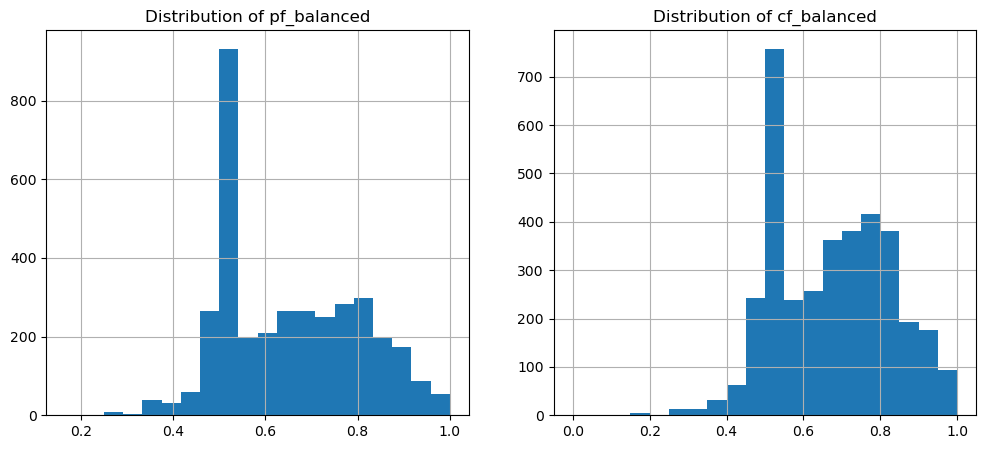

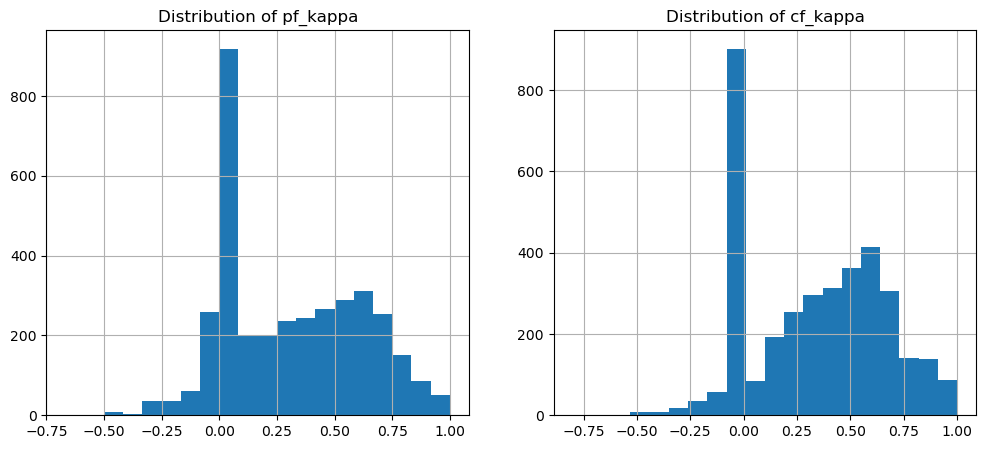

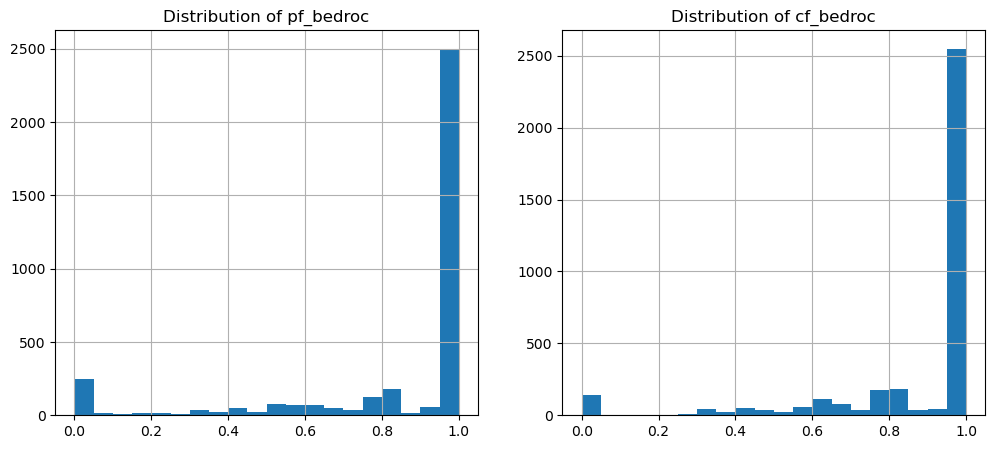

In [4]:
# The distribution of pf_auroc and cf_auroc
def plot_distribution(df, metric='auroc'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    df[f'pf_{metric}'].hist(ax=ax[0], bins=20)
    ax[0].set_title(f'Distribution of pf_{metric}')
    df[f'cf_{metric}'].hist(ax=ax[1], bins=20)
    ax[1].set_title(f'Distribution of cf_{metric}')
    plt.show()

plot_distribution(result_df, metric='auroc')
plot_distribution(result_df, metric='auprc')
plot_distribution(result_df, metric='balanced')
plot_distribution(result_df, metric='kappa')
plot_distribution(result_df, metric='bedroc')

# Hexbin plot

## FacetGrid

In [22]:
result_df['cf_ds_size_level'].describe()

count     3620
unique       2
top        b50
freq      3036
Name: cf_ds_size_level, dtype: object

Sub df shape for {'pd_cat_level': 'hhd', 'cd_cat_level': 'mhd'}: (1012, 42)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Sub df shape for {'pd_cat_level': 'hhd', 'cd_cat_level': 'hhd'}: (0, 42)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Sub df shape for {'pd_cat_level': 'hhd', 'cd_cat_level': 'mhd'}: (1012, 42)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Sub df shape for {'pd_cat_level': 'hhd', 'cd_cat_level': 'mhd'}: (1012, 42)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Sub df shape for {'pd_cat_level': 'hhd', 'cd_cat_level': 'mhd'}: (1012, 42)


/storage/homefs/yc24j783/miniconda3/envs/datacat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


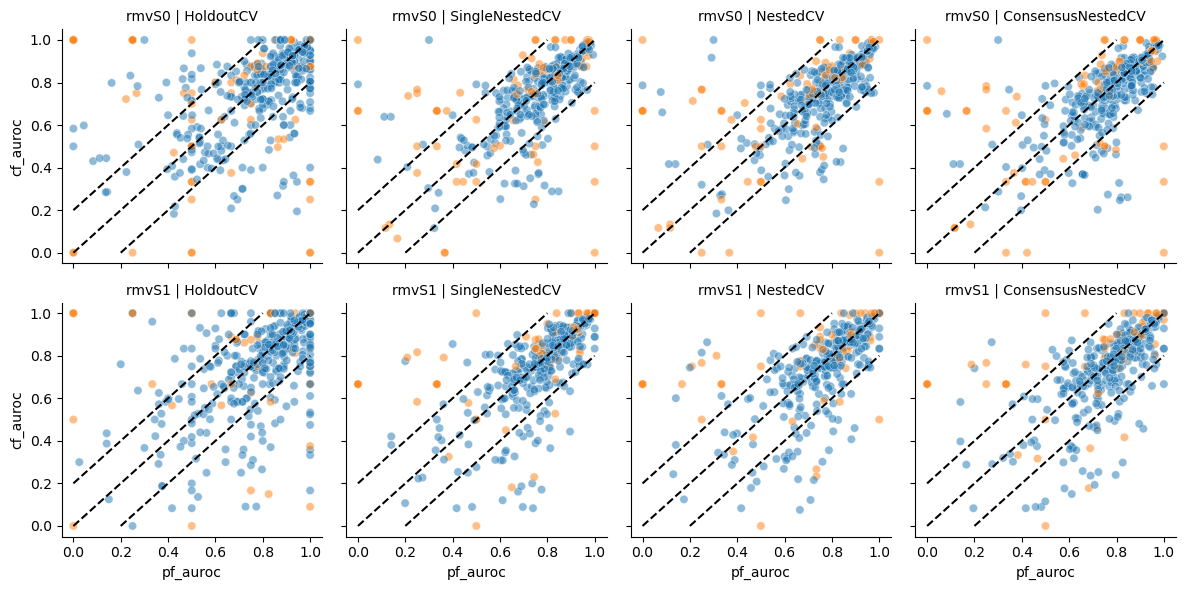

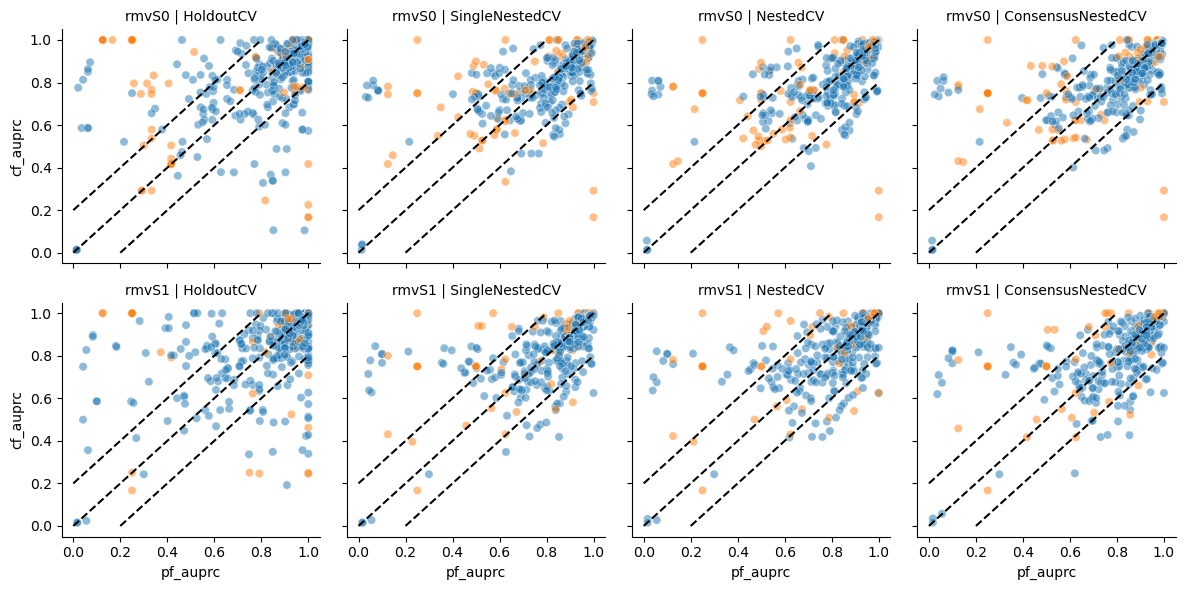

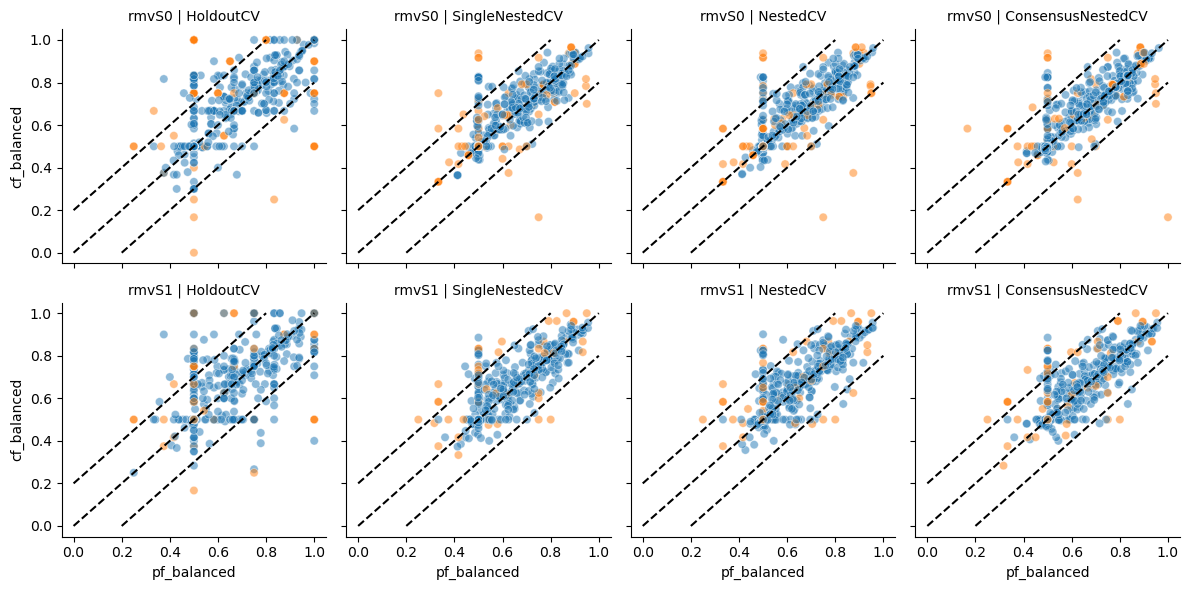

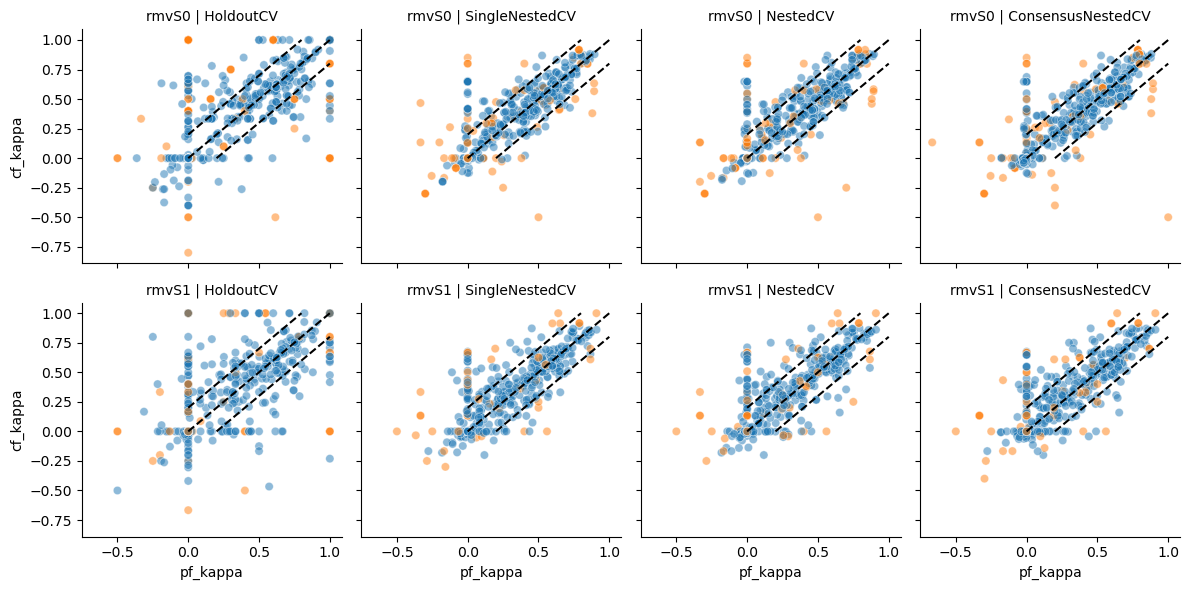

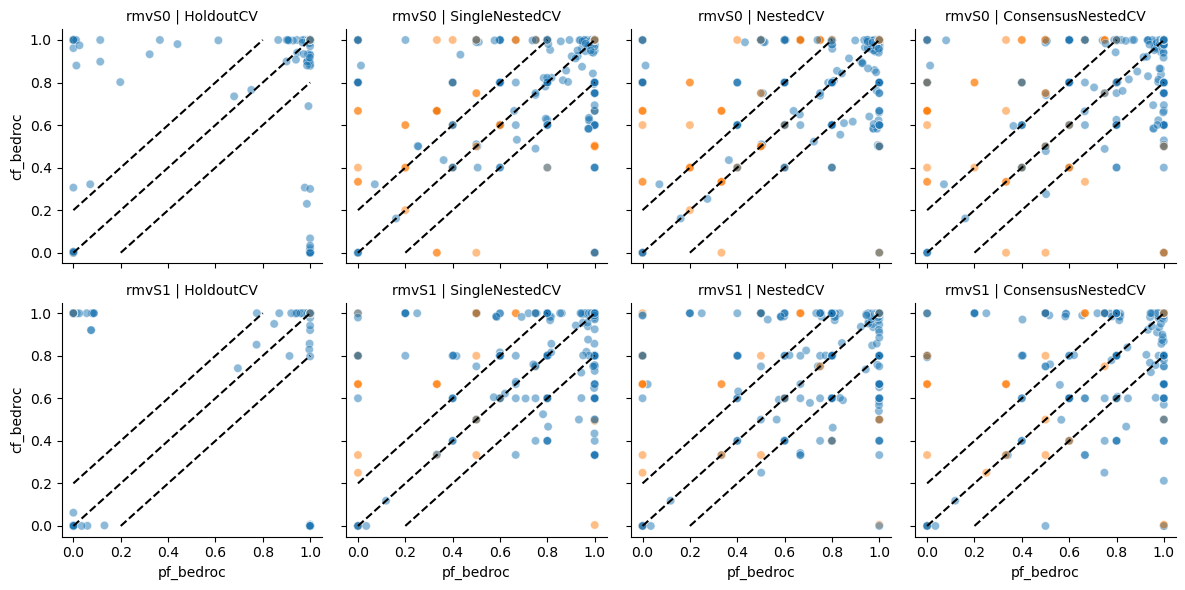

In [26]:
def facet_hexbin(metric, **kwargs):

    # prepare the data
    df = create_sub_df(result_df, **kwargs)
    print(f'Sub df shape for {kwargs}: {df.shape}')

    # order of row (rmvS) and column (pipeline) facets
    pipelines_order = [
        Pipelines[0],
        Pipelines[1],
        Pipelines[2],
        Pipelines[3]
    ]
    rmvSs_order = [
        f'rmvS{rmvSs[0]}',
        f'rmvS{rmvSs[1]}'
    ]

    # initialize the FacetGrid
    g = sns.FacetGrid(result_df, row='rmvS', col="pipeline", row_order=rmvSs_order, col_order=pipelines_order)

    g.map_dataframe(sns.scatterplot, x=f'pf_{metric}', y=f'cf_{metric}', alpha=0.5, hue='cf_ds_size_level')
    #g.map_dataframe(sns.jointplot, x=f'pf_{metric}', y=f'cf_{metric}', kind='hex', color='blue', alpha=0.5)

    # labels and titles
    g.set_titles(col_template="{col_name}", row_template="{row_name}") 

    # add a diagonal line
    for ax in g.axes.flat:
        ax.plot([0, 1], [0, 1], color='black', linewidth=1.5, linestyle='--')

        # add the reference line
        offset = 0.2
        ax.plot([0, 1-offset], [0+offset, 1], color='black', linewidth=1.5, linestyle='--')
        ax.plot([0+offset, 1], [0, 1-offset], color='black', linewidth=1.5, linestyle='--')


#facet_hexbin(metric='auroc')
facet_hexbin(metric='auroc', pd_cat_level='hhd', cd_cat_level='mhd')
facet_hexbin(metric='auprc', pd_cat_level='hhd', cd_cat_level='hhd')
facet_hexbin(metric='balanced', pd_cat_level='hhd', cd_cat_level='mhd')
facet_hexbin(metric='kappa', pd_cat_level='hhd', cd_cat_level='mhd')
facet_hexbin(metric='bedroc', pd_cat_level='hhd', cd_cat_level='mhd')
#facet_hexbin(metric='auroc', pd_cat_level='hhd', cd_cat_level='lhd')
#facet_hexbin(metric='auroc', pd_cat_level='mhd-effect', cd_cat_level='mhd')
#facet_hexbin(metric='auroc', pd_cat_level='mhd-effect', cd_cat_level='lhd')
#facet_hexbin(metric='auroc', pd_cat_level='mhd', cd_cat_level='lhd')


## single plot

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (32, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (48, 42)
Sub df shape for {'pd_cat_level': 'mhd', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (48, 42)


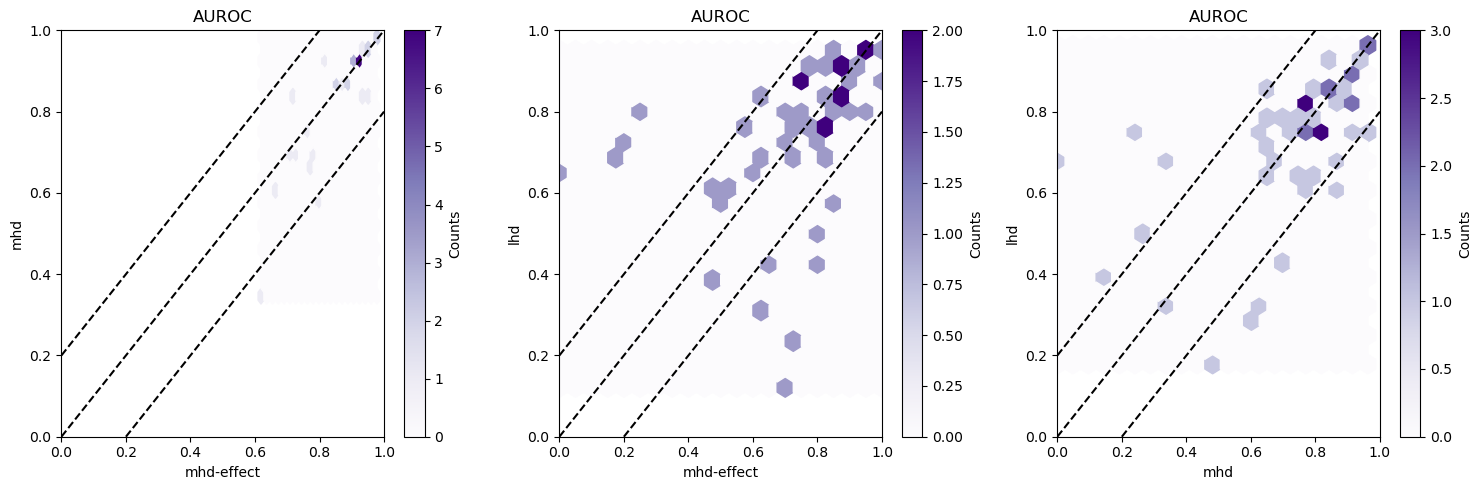

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (58, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (15, 42)
Sub df shape for {'pd_cat_level': 'mhd', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (15, 42)


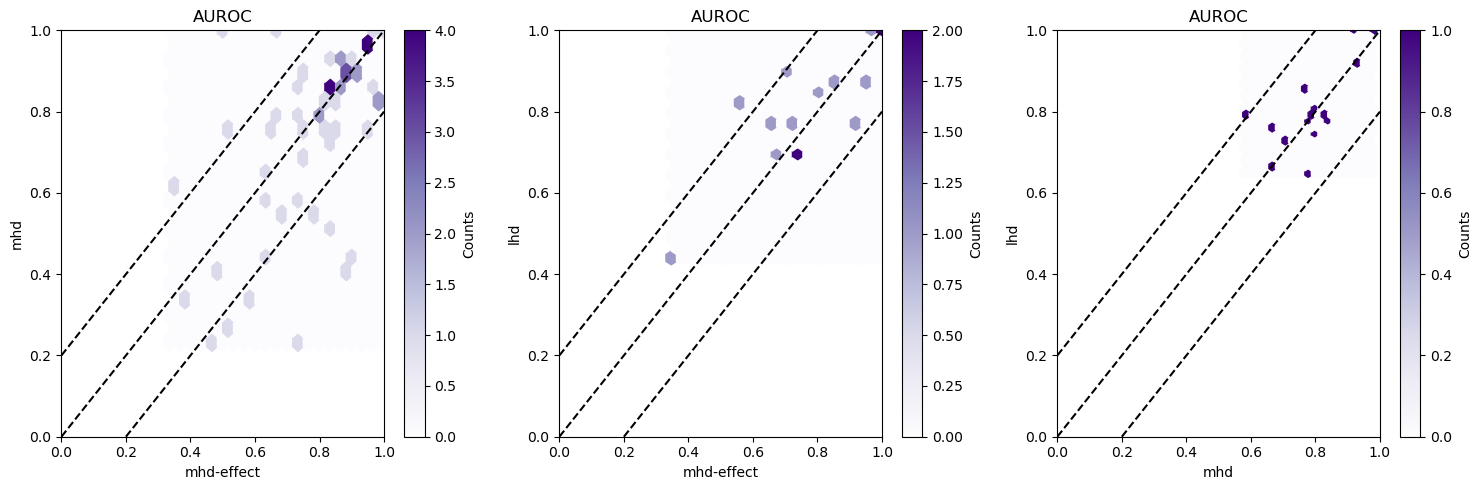

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'antag'}: (35, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'antag'}: (0, 42)
Sub df shape for {'pd_cat_level': 'mhd', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'antag'}: (0, 42)


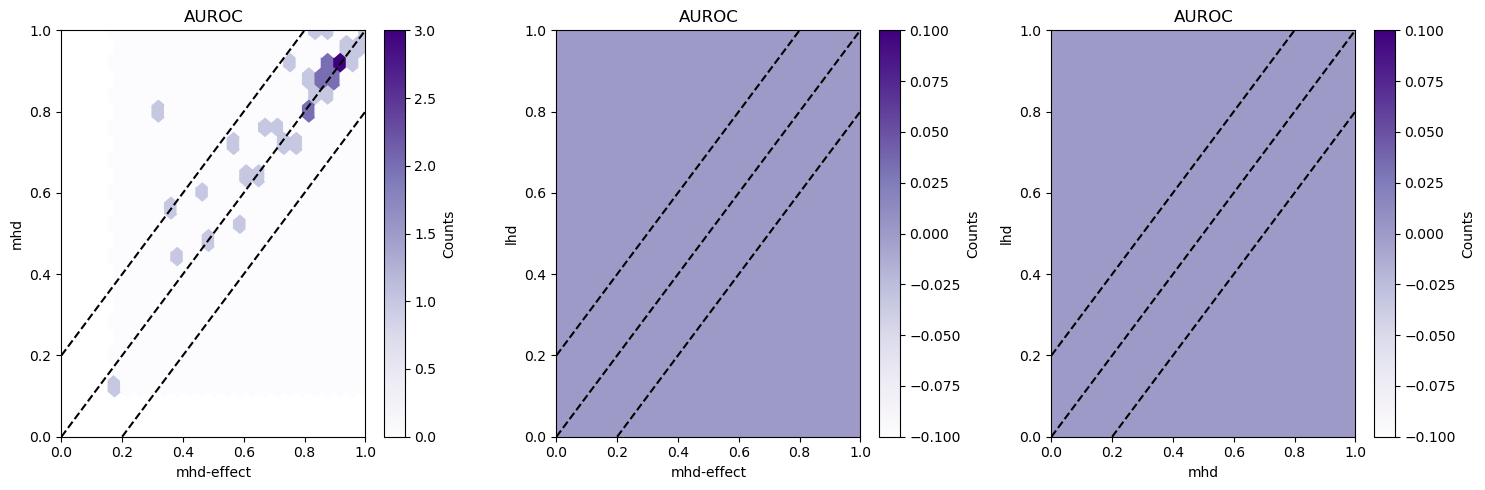

In [23]:
def plot_hexbin(metric, ax, **kwargs):

    # prepare data
    df = create_sub_df(result_df, **kwargs)
    print(f'Sub df shape for {kwargs}: {df.shape}')
    xp = np.array(df[f'pf_{metric}'])
    yp = np.array(df[f'cf_{metric}'])

    # initialize plot
    # plt.figure(figsize=(3.5, 3))
    ax.hexbin(xp, yp, gridsize=20, cmap='Purples') # Purples, Reds, Greens, Oranges, Blues

    # Set the xticks and yticks
    range = (0, 1)
    ax.set_xlim(range)
    ax.set_ylim(range)
    ax.set_xticks(np.arange(range[0], range[1]+0.1, 0.2))
    ax.set_yticks(np.arange(range[0], range[1]+0.1, 0.2))

    # add a diagonal line
    ax.plot([0, 1], [0, 1], color='black', linewidth=1.5, linestyle='--')
    # add the reference line
    offset = 0.2
    ax.plot([range[0], range[1]-offset], [range[0]+offset, range[1]], color='black', linewidth=1.5, linestyle='--')
    ax.plot([range[0]+offset, range[1]], [range[0], range[1]-offset], color='black', linewidth=1.5, linestyle='--')

    # labels and title
    ax.set_xlabel(f'{kwargs.get("pd_cat_level")}')
    ax.set_ylabel(f'{kwargs.get("cd_cat_level")}')
    ax.set_title(f'{metric.upper()}')

    # color bar
    ax.figure.colorbar(ax.collections[0]).set_label('Counts')

def plot_hexbin_batch(metric, **kwargs):

    pd_cd_pairs = [
        #('hhd', 'mhd'),
        #('hhd', 'lhd'),
        ('mhd-effect', 'mhd'),
        ('mhd-effect', 'lhd'),
        ('mhd', 'lhd')
    ]

    # define the subplots
    fig, axes = plt.subplots(1, len(pd_cd_pairs), figsize=(15, 5))

    for ax, (pd_cat_level, cd_cat_level) in zip(axes, pd_cd_pairs):
        plot_hexbin(metric=metric, ax=ax, pd_cat_level=pd_cat_level, cd_cat_level=cd_cat_level, **kwargs)


    plt.tight_layout()
    plt.show()

#plot_hexbin_batch(metric='auroc')
#
#plot_hexbin_batch(metric='auroc', pipeline='NestedCV')
#
#plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS0')
#plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1')

#plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='Ki')
#plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='IC50')
#plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='EC50')


plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_effect='bind')
plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_effect='agon')
plot_hexbin_batch(metric='auroc', pipeline='NestedCV', rmvS='rmvS1', pf_effect='antag')


# Scatterplot

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (32, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (48, 42)
Sub df shape for {'pd_cat_level': 'mhd', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'bind'}: (48, 42)


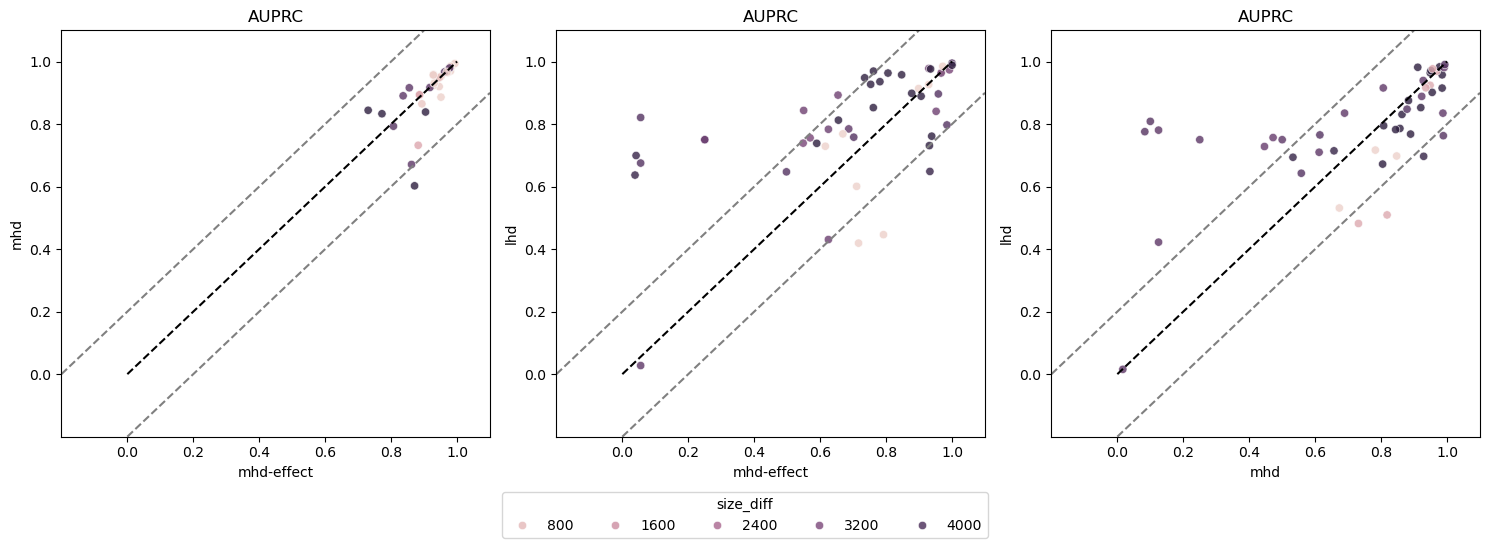

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (58, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (15, 42)
Sub df shape for {'pd_cat_level': 'mhd', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'agon'}: (15, 42)


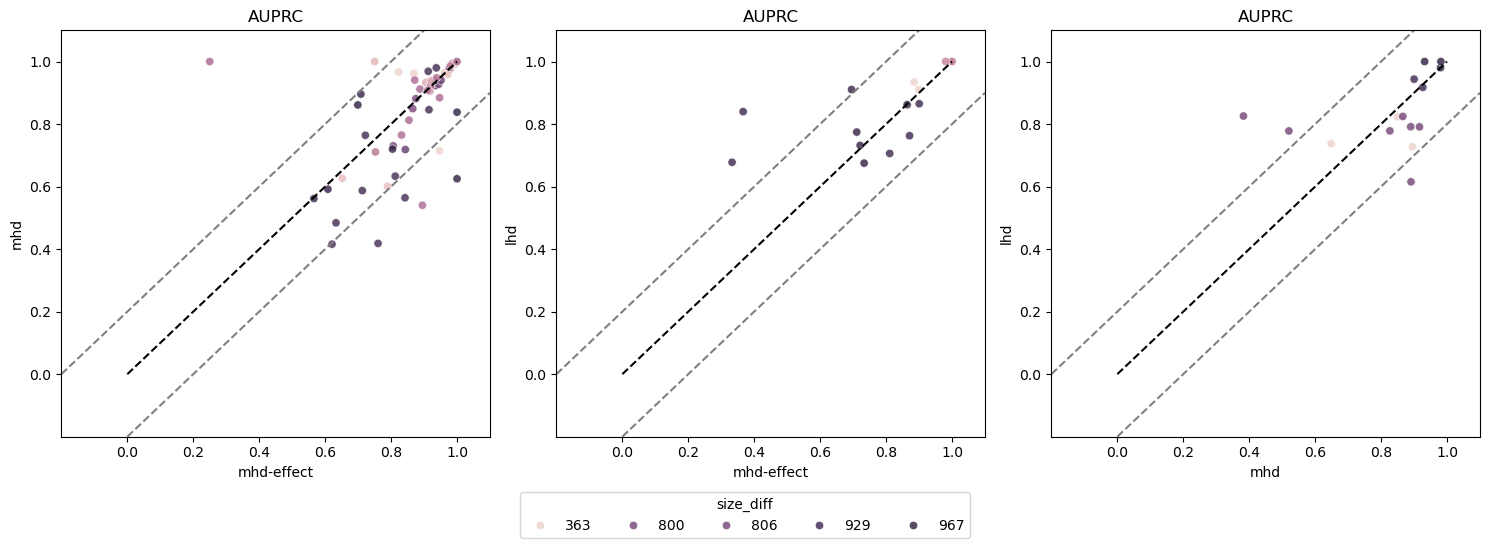

Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'mhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'antag'}: (35, 42)
Sub df shape for {'pd_cat_level': 'mhd-effect', 'cd_cat_level': 'lhd', 'pipeline': 'NestedCV', 'rmvS': 'rmvS1', 'pf_effect': 'antag'}: (0, 42)


AttributeError: 'NoneType' object has no attribute 'remove'

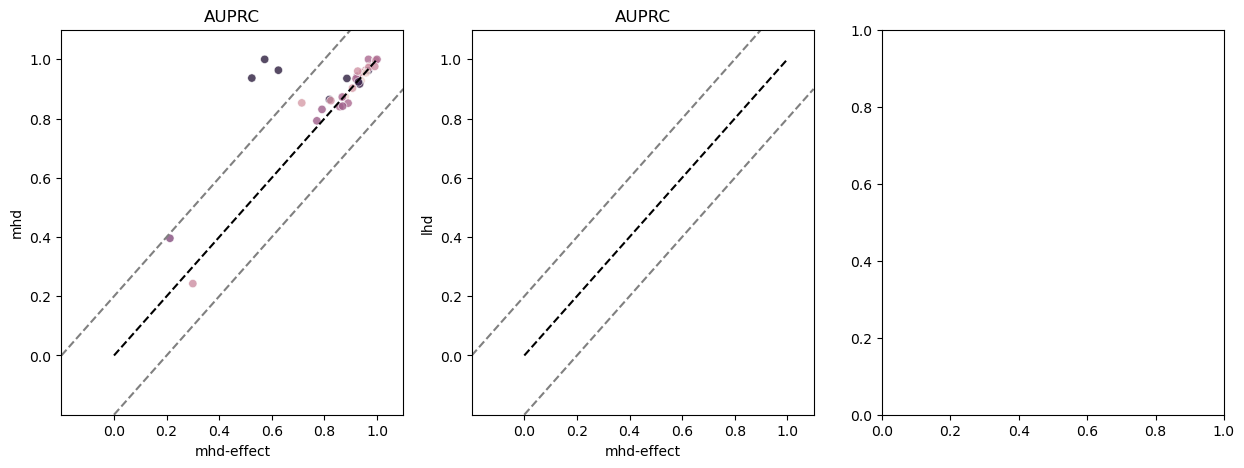

In [ ]:
def plot_scatter(metric, hue, ax, show_legend=False, **kwargs):

    # Prepare data
    df = create_sub_df(result_df, **kwargs)
    print(f'Sub df shape for {kwargs}: {df.shape}')

    # create a column which is the pf_ds_size substracting cf_ds_size
    df['size_diff'] = df['pf_ds_size'] - df['cf_ds_size']

    # Initialize plot
    #plt.figure(figsize=(3, 3))
    sns.scatterplot(data=df, x=f'pf_{metric}', y=f'cf_{metric}', alpha=0.8, # alpha means transparency
                    hue=hue, ax=ax) 

    # Set the xticks and yticks
    range = (-0.2, 1.1)
    ax.set_xlim(range)
    ax.set_ylim(range)
    ax.set_xticks(np.arange(0, 1.1, 0.2))
    ax.set_yticks(np.arange(0, 1.1, 0.2))

    # add a diagonal line
    ax.plot([0, 1], [0, 1], color='black', linewidth=1.5, linestyle='--')
    # calculat the offset for the reference line
    offset = 0.2
    # add the reference line
    ax.plot([range[0], range[1]-offset], [range[0]+offset, range[1]], color='grey', linewidth=1.5, linestyle='--')
    ax.plot([range[0]+offset, range[1]], [range[0], range[1]-offset], color='grey', linewidth=1.5, linestyle='--')

    # labels and title
    ax.set_xlabel(f'{kwargs.get("pd_cat_level")}')
    ax.set_ylabel(f'{kwargs.get("cd_cat_level")}')
    ax.set_title(f'{metric.upper()}')

    # set the location of the legend
    # ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title=hue)
    # Return handles only if legend needed
    if show_legend:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        return handles, labels

    ax.get_legend().remove()
    return None, None

def plot_scatter_batch(metric='auroc', hue='size_diff', **kwargs):

    pd_cd_pairs = [
        #('hhd', 'mhd'),
        #('hhd', 'lhd'),
        ('mhd-effect', 'mhd'),
        ('mhd-effect', 'lhd'),
        ('mhd', 'lhd')
    ]
    
    fig, axes = plt.subplots(1, len(pd_cd_pairs), figsize=(15, 5)) # if len(pd_cd_pairs)=5, figsize=(25, 5)

    shared_handles, shared_labels = None, None

    for i, (ax, (pd_cat_level, cd_cat_level)) in enumerate(zip(axes, pd_cd_pairs)):
        show_legend = (i == len(pd_cd_pairs) - 1)  # only for the last plot
        shared_handles, shared_labels = plot_scatter(
            metric=metric, hue=hue, ax=ax, show_legend=show_legend,
            pd_cat_level=pd_cat_level, cd_cat_level=cd_cat_level, **kwargs
        )

    # Single shared legend outside plot
    if shared_handles and shared_labels:
        fig.legend(shared_handles, shared_labels, title=hue,
                   loc='lower center', ncol=len(shared_labels),
                   bbox_to_anchor=(0.5, -0.1))

    plt.tight_layout()
    plt.show()

##plot_scatter(metric='auroc')
## hue by size_diff: all pipelines
#plot_scatter_batch(metric='auroc', hue='size_diff')
#plot_scatter_batch(metric='auroc', hue='pf_percent_a')
#plot_scatter_batch(metric='auroc', hue='cf_percent_a')
#
## pipeline = NestedCV
#plot_scatter_batch(metric='auroc', hue='size_diff', pipeline='NestedCV')
#plot_scatter_batch(metric='auroc', hue='pf_percent_a', pipeline='NestedCV')
#plot_scatter_batch(metric='auroc', hue='cf_percent_a', pipeline='NestedCV')

## rmvS=0
#plot_scatter_batch(metric='auroc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS0')
#plot_scatter_batch(metric='auroc', hue='pf_percent_a', pipeline='NestedCV', rmvS='rmvS0')
#plot_scatter_batch(metric='auroc', hue='cf_percent_a', pipeline='NestedCV', rmvS='rmvS0')

# rmvS=1
#plot_scatter_batch(metric='auroc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1')
#plot_scatter_batch(metric='auroc', hue='pf_percent_a', pipeline='NestedCV', rmvS='rmvS1')
#plot_scatter_batch(metric='auroc', hue='cf_percent_a', pipeline='NestedCV', rmvS='rmvS1')

## pipeline = NestedCV, rmvS=1, pf_standard_type='IC50'
#plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='Ki')
#plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='IC50')
#plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_standard_type='EC50')

# pipeline = NestedCV, rmvS=1, pf_effect = 'bind', 'agon', 'antag'
plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_effect='bind')
plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_effect='agon')
plot_scatter_batch(metric='auprc', hue='size_diff', pipeline='NestedCV', rmvS='rmvS1', pf_effect='antag')

# Boxplot

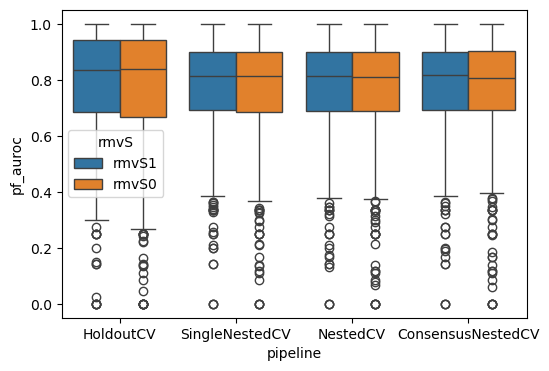

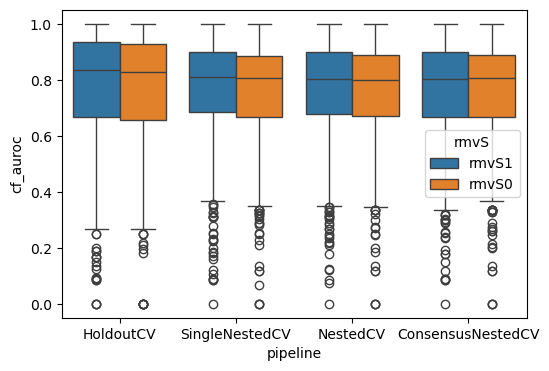

In [48]:
def plot_box(x, y, hue='rmvS'):

    plt.figure(figsize=(6, 4))

    sns.boxplot(data=result_df, x=x, y=y, order=Pipelines, hue=hue)

plot_box(x='pipeline', y='pf_auroc', hue='rmvS')
plot_box(x='pipeline', y='cf_auroc', hue='rmvS')


# Radar chart

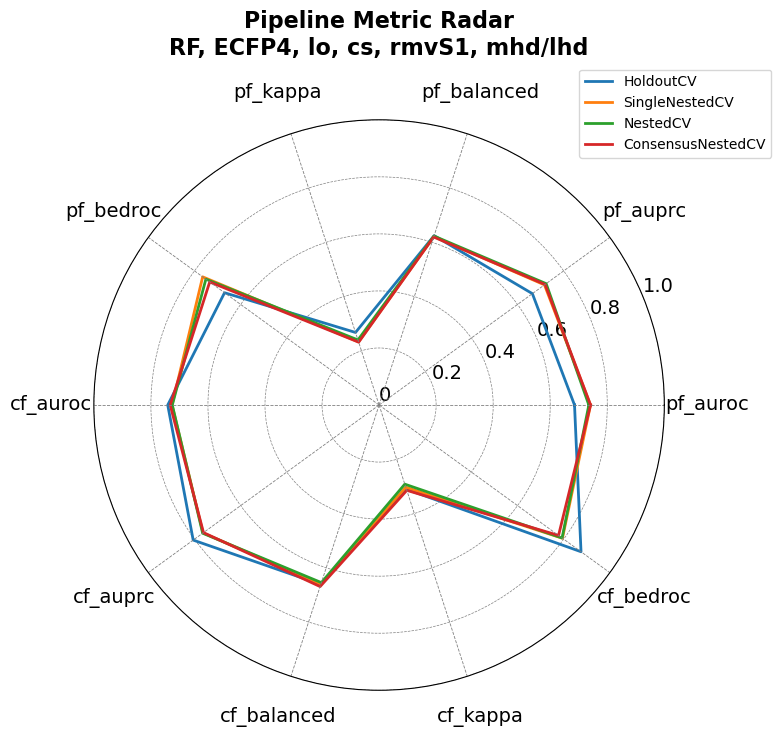

In [55]:
def plot_radar(df, algo, descriptor, aim, spl, rmvS,
               pd_cat_level, cd_cat_level):
    
    #################### prepare data ####################
    metrics = [
        'pf_auroc', 'pf_auprc', 'pf_balanced', 'pf_kappa', 'pf_bedroc',
        'cf_auroc', 'cf_auprc', 'cf_balanced', 'cf_kappa', 'cf_bedroc'
    ]

    # Filter the group
    gdf = df[
        (df['algo'] == algo) &
        (df['descriptor'] == descriptor) &
        (df['aim'] == aim) &
        (df['spl'] == spl) &
        (df['rmvS'] == rmvS) &
        (df['pd_cat_level'] == pd_cat_level) &
        (df['cd_cat_level'] == cd_cat_level)
    ]

    if gdf.empty:
        print("No matching rows found for selected conditions.")
        return

    # Pivot into pipeline → metric mean
    radar_df = gdf.groupby('pipeline')[metrics].mean()

    # Fill missing metrics with 0
    radar_df = radar_df.fillna(0)

    # legend order
    radar_df = radar_df.reindex(Pipelines)

    # Radar coordinates
    labels = radar_df.columns.tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # connect end to start

    ##################### initialize plot #####################
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for pipeline, row in radar_df.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=pipeline)
        #ax.fill(angles, values, alpha=0.15)

    ##################### adjust plot #####################
    # x
    ax.set_xticks([]) # disable default angle labels (0°, 45°...)
    # radial lines at each metric
    for angle in angles[:-1]:
        ax.plot([angle, angle], [0, 1], color='gray', linestyle='--', linewidth=0.6)
    # move labels further outside
    label_padding = 1.15 # 15% further outside radius
    for angle, label in zip(angles[:-1], labels):
        ax.text(angle, label_padding, label, 
                ha='center', va='center', fontsize=14)

    # y
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    ax.set_yticks(ticks)
    ax.set_yticklabels([str(t) for t in ticks], fontsize=14)
    ax.set_ylim(0, 1)

    # gridline
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

    # title
    plt.title(f"Pipeline Metric Radar\n{algo}, {descriptor}, {aim}, {spl}, {rmvS}, {pd_cat_level}/{cd_cat_level}",
              fontsize=16, fontweight='bold', y=1.1) # y=1.05 to move title up
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.show()

plot_radar(
    result_df,
    algo="RF", # options: "RF", "GB", "SVM", "KNN"
    descriptor="ECFP4", # options: "ECFP4", "ECFP6", "MACCS", "RDKit" ... 
    aim='lo', # options: 'vs', 'lo' => bedroc should be used for 'vs'.
    spl="cs", # options: "rs-lo", "
    # aim_spl_combo = 'vs_rs-lo' # options: 'lo_rs-lo', 'lo_cs', 'vs_rs-vs', 'vs_ch'
    rmvS="rmvS1", # rmvS options: "rmvS0", "rmvS1"
    pd_cat_level="mhd",
    cd_cat_level="lhd",
)

# Test code

## optuna-hpo

In [ ]:
#----model----
model = RF # KNN, GB, RF, SVM
#----config----
config = get_config(os.path.join(ML_HP_DIR, f'{model.__name__}.json'))
print(f'config: \n{config}')
#----prepare data: inner_splits, x, y ----
#fpath = os.path.join(FEAT_HHD_OR_DIR, 'rmvD0', 'CHEMBL233_None_None_Ki_None_hhd_b50_b50_ECFP4.pkl')
fpath = os.path.join(FEAT_LHD_OR_DIR, 'rmvD0', 'CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720_lhd_b50_b50_featurized.pkl')
# fpath = os.path.join(FEAT_DATA_DIR, 'old', 'feat_lhd_or', 'rmvDupMol0', 'CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720_lhd_b50_b50_featurized.pkl') => can't use the old files due to the altered split columns.
data = MLData(fpath)
data(descriptor='ECFP4', rmvS=0, aim='vs', spl='rs_lo')
data.get_int_splits()

inner_splits = data.int_inner_splits
x = data.x
y = data.y

#----- run optuna_hpo -----
best_hparams, best_value = optuna_hpo(config, model, inner_splits, x, y, metric='auroc')
print(f'Best hyperparameters: {best_hparams}')
print(f'Best mean AUROC from inner CV: {best_value}')
print(f'inner_splits: {inner_splits},\nx: {x},\ny: {y}')

[I 2025-10-31 16:38:16,769] A new study created in memory with name: no-name-c1cde081-8b55-4bc6-aca7-cb7732649789


config: 
{'n_estimators': [100, 250, 500, 1000]}
x length: 64
y length: 64
activity_ids length: 64
col_prefix: int.rmvS0_rs_lo
col_names: ['int.rmvS0_rs_lo_fold0', 'int.rmvS0_rs_lo_fold1', 'int.rmvS0_rs_lo_fold2', 'int.rmvS0_rs_lo_fold3', 'int.rmvS0_rs_lo_fold4']

Number of outer splits found: 5
Generating outer splits for int.rmvS0_rs_lo...
Unique classes in outer_y_train: [0. 1.], counts: [25 26]
minClass_count: 25
Unique classes in outer_y_train: [0. 1.], counts: [25 26]
minClass_count: 25
Unique classes in outer_y_train: [0. 1.], counts: [26 25]
minClass_count: 25
Unique classes in outer_y_train: [0. 1.], counts: [26 25]
minClass_count: 25
Unique classes in outer_y_train: [0. 1.], counts: [26 26]
minClass_count: 26
max_minClass_count: 26
Generating inner splits for int.rmvS0_rs_lo...
min_class_count: 26
Inner train folds: [[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 17, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], [1, 

0it [00:00, ?it/s]


Fold 1/5 for RF
Creating the model...
Model created.
Training the model...


1it [00:00,  1.68it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 0 AUROC: 0.6333333333333333

Fold 2/5 for RF
Creating the model...
Model created.
Training the model...


2it [00:01,  1.72it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 1 AUROC: 0.5

Fold 3/5 for RF
Creating the model...
Model created.
Training the model...


3it [00:01,  1.70it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 2 AUROC: 0.6

Fold 4/5 for RF
Creating the model...
Model created.
Training the model...


4it [00:02,  1.71it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 3 AUROC: 0.92

Fold 5/5 for RF
Creating the model...
Model created.
Training the model...


5it [00:02,  1.71it/s]
[I 2025-10-31 16:38:19,690] Trial 0 finished with value: 0.6906666666666667 and parameters: {'n_estimators': 500}. Best is trial 0 with value: 0.6906666666666667.


Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 4 AUROC: 0.8

---Trial 1 ---
Sampled HParams: {'n_estimators': 1000}


0it [00:00, ?it/s]


Fold 1/5 for RF
Creating the model...
Model created.
Training the model...


1it [00:01,  1.05s/it]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 0 AUROC: 0.6

Fold 2/5 for RF
Creating the model...
Model created.
Training the model...


2it [00:02,  1.05s/it]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 1 AUROC: 0.5

Fold 3/5 for RF
Creating the model...
Model created.
Training the model...


3it [00:03,  1.06s/it]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 2 AUROC: 0.6

Fold 4/5 for RF
Creating the model...
Model created.
Training the model...


4it [00:04,  1.06s/it]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 3 AUROC: 0.9

Fold 5/5 for RF
Creating the model...
Model created.
Training the model...


5it [00:05,  1.06s/it]
[I 2025-10-31 16:38:24,974] Trial 1 finished with value: 0.68 and parameters: {'n_estimators': 1000}. Best is trial 0 with value: 0.6906666666666667.


Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 4 AUROC: 0.8

---Trial 2 ---
Sampled HParams: {'n_estimators': 250}


0it [00:00, ?it/s]


Fold 1/5 for RF
Creating the model...
Model created.
Training the model...


1it [00:00,  2.99it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 0 AUROC: 0.6333333333333333

Fold 2/5 for RF
Creating the model...
Model created.
Training the model...


2it [00:00,  2.96it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 1 AUROC: 0.5666666666666667

Fold 3/5 for RF
Creating the model...
Model created.
Training the model...


3it [00:01,  2.96it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 2 AUROC: 0.6

Fold 4/5 for RF
Creating the model...
Model created.
Training the model...


4it [00:01,  2.93it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 3 AUROC: 0.88

Fold 5/5 for RF
Creating the model...
Model created.
Training the model...


5it [00:01,  2.95it/s]
[I 2025-10-31 16:38:26,674] Trial 2 finished with value: 0.696 and parameters: {'n_estimators': 250}. Best is trial 2 with value: 0.696.


Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 4 AUROC: 0.8

---Trial 3 ---
Sampled HParams: {'n_estimators': 100}


0it [00:00, ?it/s]


Fold 1/5 for RF
Creating the model...
Model created.
Training the model...


1it [00:00,  5.21it/s]

Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 0 AUROC: 0.6166666666666667

Fold 2/5 for RF
Creating the model...
Model created.
Training the model...
Model trained.
Validating the model...
Model validated.


2it [00:00,  5.16it/s]

metric is auroc, Fold 1 AUROC: 0.4666666666666667

Fold 3/5 for RF
Creating the model...
Model created.
Training the model...
Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 2 AUROC: 0.6799999999999999


4it [00:00,  5.17it/s]


Fold 4/5 for RF
Creating the model...
Model created.
Training the model...
Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 3 AUROC: 0.92

Fold 5/5 for RF
Creating the model...
Model created.
Training the model...


5it [00:00,  5.16it/s]
[I 2025-10-31 16:38:27,646] Trial 3 finished with value: 0.6966666666666667 and parameters: {'n_estimators': 100}. Best is trial 3 with value: 0.6966666666666667.


Model trained.
Validating the model...
Model validated.
metric is auroc, Fold 4 AUROC: 0.8
Best hyperparameters: {'n_estimators': 100}
Best mean AUROC from inner CV: 0.6966666666666667
inner_splits: [{'inner_train_idx': [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 14, 16, 18, 20, 26, 27, 28, 29, 30, 32, 33, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 50, 51, 52, 53, 55, 56, 58, 60, 61, 63], 'inner_valid_idx': [10, 12, 15, 19, 23, 24, 25, 31, 34, 35, 43]}, {'inner_train_idx': [2, 5, 6, 7, 10, 11, 12, 13, 14, 15, 18, 19, 20, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 50, 52, 55, 56, 58, 60, 61], 'inner_valid_idx': [1, 3, 4, 9, 16, 27, 32, 44, 51, 53, 63]}, {'inner_train_idx': [1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, 19, 20, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 51, 52, 53, 56, 58, 60, 63], 'inner_valid_idx': [5, 14, 18, 26, 29, 30, 48, 50, 55, 61]}, {'inner_train_idx': [1, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15, 16, 18, 1

## Pipeline

In [ ]:
# for `filepath` 
ds_path = ['feat_hhd_or', 'feat_mhd-effect_or', 'feat_mhd_or', 'feat_lhd_or']
rmvDs = [0, 1] # when rmvD1, the test set in parent file would be possibly more than that in the child file.

# for `filename`
targets = ['CHEMBL233', 'CHEMBL237', 'CHEMBL236', 'CHEMBL2014']
effects = ['None', 'bind', 'agon', 'antag']
assays = ['None', 'RBA', 'G-GTP', 'G-cAMP', 'G-Ca', 'B-arrest']
standard_types = ['None', 'Ki', 'IC50', 'EC50']
assay_chembl_ids = ['None', 'CHEMBL867087', 'CHEMBL1030622', 'CHEMBL3888830'] # just name a few here

# for x
descriptors = ['ECFP4', 'ECFP6', 'MACCS', 'RDKITFP', 'PHARM2D', 'ERG',
               'PHYSICOCHEM',
               'SHAPE3D', 'AUTOCORR3D', 'RDF', 'MORSE', 'WHIM', 'GETAWAY'
               ]
# for y
aims = ['vs', 'lo']

# for train/test split
SPLs = ['int', 'aln']

# internal split (e.g. int.
#                      rmvS0_cs_fold0)
rmvSs = [0, 1] # when rmvS1, the test set in parent file would be possibly less than that in the child file.
spls = ['rs-lo', 'rs-vs', 'cs', 'ch']

# aligned split (e.g. aln. => Yu: need to carefully consider the pipeline here.
#                     child.
#                     hhd.mhd.
#                     CHEMBL233_None_None_Ki_None.
#                     CHEMBL233_bind_RBA_Ki_None.
#                     rmvS0_rs-lo_fold0)
positions = ['parent', 'child']
pairs = ['hhd.mhd', 'hhd.lhd', 'mhd-effect.mhd', 'mhd-effect.lhd', 'mhd.lhd']
parent_filenames = []
child_filenames = []

#YU if:
int_col = ['int.rmvS0_rs-lo', 'int.rmvS0_rs-vs', 'int.rmvS0_cs', 'int.rmvS0_ch',
           'int.rmvS1_rs-lo', 'int.rmvS1_rs-vs', 'int.rmvS1_cs', 'int.rmvS1_ch']
aln_col = ['aln.child.hhd.mhd.pfname.cfname.int_col']
aln_col = ['aln.child.pfname.cfname.int_col']

# for pipelines => Yu: consider a better name
pipelines = ['simpleCV', 'nestedCV_singleLoop', 'full_nestedCV', 'consensus_nestedCV']

In [ ]:
#----model----
model = RF # KNN, GB, RF, SVM
#----config----
config = get_config(os.path.join(ML_HP_DIR, f'{model.__name__}.json'))
print(f'config: \n{config}')
#---- data: MLData object ----
fpath = os.path.join(FEAT_LHD_OR_DIR, 'rmvD0', 'CHEMBL233_agon_G-GTP_EC50_CHEMBL3888720_lhd_b50_b50_featurized.pkl')

data = MLData(fpath)

descriptor = 'ECFP4'
aim = 'vs'
rmvS = 0
spl = 'rs_vs'
data(descriptor, rmvS, aim, spl)
data.get_int_splits()

#----run holdout CV----
metrics = consensus_nested_cv(config, model, data, save_config=True, save_model=True, verbose=True,
                            SPL='int', position=None)
print(f'Holdout CV metrics: {metrics}')

config: 
{'n_estimators': [100, 250, 500, 1000]}
Generating outer splits for int.rmvS0_rs_vs...
minClass_count: 25
minClass_count: 25
minClass_count: 25
minClass_count: 25
minClass_count: 26
max_minClass_count: 26
Generating inner splits for int.rmvS0_rs_vs...
min_class_count: 26
Inner train folds: [[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15, 17, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], [1, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 47, 48, 49, 51], [0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 37, 38, 39, 41, 42, 43, 45, 46, 48, 49, 50, 51], [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19

## Benchmark

In [ ]:
# ===== model =====
algos = [RF, GB, SVM, KNN]
algos = [RF] # Yu: for testing purpose
# ===== data =====
# ----- directory -----
input_dirs = [FEAT_HHD_OR_DIR, FEAT_MHD_effect_OR_DIR, FEAT_MHD_OR_DIR, FEAT_LHD_OR_DIR]

rmvDs = [0, 1]
# ----- file -----
# identifiers in filename
# ----- x -----
descriptors = ['ECFP4','ECFP6','MACCS','RDKITFP','PHARM2D','ERG',
               'PHYSICOCHEM',
               'SHAPE3D','AUTOCORR3D','RDF','MORSE','WHIM','GETAWAY'
             ]
descriptors = ['ECFP4'] # Yu: for testing purpose
# ----- y -----
# aims = ['vs', 'lo']
# ----- split columns -----
SPLs = ['int', 'aln']
rmvSs = [0, 1]
aim_spl_combinations = {
    'lo': ['rs-lo', 'cs'], # when aim is 'lo', the test set would have similar structures as those in the training set. Thus, 'cs', i.e. cluster-stratified splitting is suitable here.
    'vs': ['rs-vs', 'ch']
}

# ----- pipelines -----




count = internal_benchmark(bmk_file='ml_internal_benchmark.csv')

pd_cd_pairs is 
[('hhd', 'mhd'), ('hhd', 'lhd'), ('mhd-effect', 'mhd'), ('mhd-effect', 'lhd'), ('mhd', 'lhd')]
ds_path: feat_hhd_or
descriptor: ECFP4, aim: lo, rmvS: 0, spl: rs-lo


KeyError: 'ECFP4'

In [ ]:
from datacat4ml.Scripts.data_prep.data_split.alnSplit_mldata import get_pd_cd_pairs, alignment_map, dir_name_dict, get_pfp_cfps_all

pd_cd_pairs = get_pd_cd_pairs(alignment_map)
print(f'pd_cd_pairs: \n{pd_cd_pairs}')
# pd_cd_pairs = [('hhd', 'mhd'), 
#                ('hhd', 'lhd'), 
#                ('mhd-effect', 'mhd'), 
#                ('mhd-effect', 'lhd'), 
#                ('mhd', 'lhd')]
pfp_cfps_all = get_pfp_cfps_all(rmvD=1)
print(f'pfps_cfps_all: \n{pfp_cfps_all}')
#pfp_cfps_all: dict. A static variable defined in alnSplit_mldata.py
#    during aligned splitting, the mapping from parent files to child files. 
#    i.e. {('hhd', 'mhd'):
#            {'CHEMBL233_None_None_Ki_None_hhd_b50_b50_split.csv': 
#                ['CHEMBL233_antag_G-GTP_Ki_None_mhd_b50_b50_split.csv', 
#                'CHEMBL233_bind_RBA_Ki_None_mhd_b50_b50_split.csv'], 
#                }
#          ...
#          }

for pd_cd_pair, pfp_cfps_map in pfp_cfps_all.items():
    print(f'pd_cd_pair: {pd_cd_pair}\n')
    print(f'pd_cat_level: {pd_cd_pair[0]}, cd_cat_level: {pd_cd_pair[1]}') # e.g. hhd,mhd

    pd_cat_level, cd_cat_level = pd_cd_pair
    print(f'pd_cat_level: {pd_cat_level}, cd_cat_level: {cd_cat_level}')
    
    for pf, cfs in pfp_cfps_map.items():
        print(f'parent file: {pf}, \nchild files: \n{cfs}')

        if len(cfs) == 0:
            print('No child files found, skip this pair.')
        else:
            for cf in cfs:
                print(f'cf to be processed: \n{cf}')
        print('---------------------------------')
    print('#################################')

pd_cd_pairs: 
[('hhd', 'mhd'), ('hhd', 'lhd'), ('mhd-effect', 'mhd'), ('mhd-effect', 'lhd'), ('mhd', 'lhd')]
pfps_cfps_all: 
{('hhd', 'mhd'): {'CHEMBL233_None_None_Ki_None_hhd': ['CHEMBL233_antag_G-GTP_Ki_None_mhd', 'CHEMBL233_bind_RBA_Ki_None_mhd'], 'CHEMBL236_None_None_IC50_None_hhd': ['CHEMBL236_bind_RBA_IC50_None_mhd', 'CHEMBL236_agon_G-cAMP_IC50_None_mhd', 'CHEMBL236_antag_B-arrest_IC50_None_mhd', 'CHEMBL236_antag_G-GTP_IC50_None_mhd'], 'CHEMBL233_None_None_IC50_None_hhd': ['CHEMBL233_antag_B-arrest_IC50_None_mhd', 'CHEMBL233_agon_G-cAMP_IC50_None_mhd', 'CHEMBL233_bind_RBA_IC50_None_mhd', 'CHEMBL233_antag_G-GTP_IC50_None_mhd'], 'CHEMBL237_None_None_Ki_None_hhd': ['CHEMBL237_antag_G-GTP_Ki_None_mhd', 'CHEMBL237_bind_RBA_Ki_None_mhd'], 'CHEMBL2014_None_None_EC50_None_hhd': ['CHEMBL2014_agon_G-cAMP_EC50_None_mhd', 'CHEMBL2014_agon_G-Ca_EC50_None_mhd', 'CHEMBL2014_agon_G-GTP_EC50_None_mhd'], 'CHEMBL236_None_None_EC50_None_hhd': ['CHEMBL236_agon_B-arrest_EC50_None_mhd', 'CHEMBL236_agon

## balance data

In [3]:
from typing import List
from datacat4ml.const import RANDOM_SEED, FEAT_HHD_OR_DIR
from datacat4ml.Scripts.model_dev.ml_dataloader import MLData


fpath = os.path.join(FEAT_HHD_OR_DIR, 'rmvD1', 'CHEMBL236_None_None_EC50_None_hhd_b50_b50_featurized.pkl')
data = MLData(fpath) # initialize the MLData object
data(descriptor='ECFP4', aim='vs', spl='rs-vs') # get x and y
data.get_int_splits(rmvS=1) # get internal splits with rmvS=1

int_outer_x_train_pick = data.int_outer_x_train_pick
int_outer_y_train_pick = data.int_outer_y_train_pick
int_outer_x_test_pick = data.int_outer_x_test_pick
int_outer_y_test_pick = data.int_outer_y_test_pick

print(f'len(int_outer_x_train_pick): {len(int_outer_x_train_pick)}')
print(f'len(int_outer_y_train_pick): {len(int_outer_y_train_pick)}')
print(f'len(int_outer_x_test_pick): {len(int_outer_x_test_pick)}')
print(f'len(int_outer_y_test_pick): {len(int_outer_y_test_pick)}')

percent_a_train = sum(int_outer_y_train_pick) / len(int_outer_y_train_pick) * 100
percent_a_test = sum(int_outer_y_test_pick) / len(int_outer_y_test_pick)
print(f'percent_a_train: {percent_a_train:.2f}%')
print(f'percent_a_test: {percent_a_test:.2f}%')

len(int_outer_x_train_pick): 506
len(int_outer_y_train_pick): 506
len(int_outer_x_test_pick): 127
len(int_outer_y_test_pick): 127
percent_a_train: 92.49%
percent_a_test: 0.93%


In [6]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

BALANCE_FUNCS = {
    # traditional; suitable for straightforward augmentation needs
    'smote': SMOTE, 
    ## focus on local densities of minority class; suitable for scenarios where class distribution varies across the feature space. 
    ## in my case, active/inactive compounds have the similar distribution accroding to Tsne plots, so not suitable.
    #'adasyn': ADASYN, 
    ##generates samples near the decision boundary between the minority nad majority clases; Suitable for aiming a high generalization performance. Not suitable for my case.
    #'borderline': BorderlineSMOTE, 
    ## removes samples that are misclassified by their nearest neighbors from both classes after applying SMOTE; Suitable to remove noisy and ambiguous samples
    #'smote_enn': SMOTEENN,
    # remove sample pairs that are clost to each other but belong to different classes after applying SMOTE;
    # this reduce the overlap between classes and imporve the classifier's performance.
    # in my case, for potential activity cliff compounds, this method can avoid generating these fake activity cliff compounds.
    'smote_tomek': SMOTETomek
}

def balance_data(x: List, y: List, method='smote'):
    """
    Balance the dataset using the specified oversampling technique.

    Params:
    -------
    x: List
        Feature set.
    y: List
        Labels.
    method: str
        oversampling method. Options: 'smote', 'adasyn', 
    """

    n_neighbors = min(5, (len(y)-1)) # 5 is default in SMOTE, but if len(y) < 5, set n_neighbors to len(y)-1
    
    func = BALANCE_FUNCS[method]
    if method in ['smote', 'adasyn', 'borderline']:
        balance_func = func(sampling_strategy='minority', random_state=RANDOM_SEED, k_neighbors=n_neighbors)
    elif method in ['smote_enn', 'smote_tomek']:
        balance_func = func(sampling_strategy='minority', random_state=RANDOM_SEED)

    x_res, y_res = balance_func.fit_resample(np.array(x), np.array(y))

    return x_res, y_res

# Example usage:

x_res, y_res = balance_data(int_outer_x_train_pick, int_outer_y_train_pick, method='smote_tomek')
print(f'len(x_res): {len(x_res)}')
print(f'len(y_res): {len(y_res)}')
percent_a_res = sum(y_res) / len(y_res) * 100
print(f'percent_a_res: {percent_a_res:.2f}%')

len(x_res): 936
len(y_res): 936
percent_a_res: 50.00%


## augment data

In [8]:
from rdkit import Chem

def randomize_smiles(smi: str):
    """
    Perform a randomization of a SMILES string.

    params:
    -------
    smi: str
        The original SMILES string.
    n: int
        Number of randomizations to perform.
    """

    m = Chem.MolFromSmiles(smi)
    ans = list(range(m.GetNumAtoms()))
    np.random.shuffle(ans)
    nm = Chem.RenumberAtoms(m, ans)
    return Chem.MolToSmiles(nm, canonical=False, isomericSmiles=True)

# Example usage:
original_smi = 'N[C@@H](c1ccc(Oc2ccccc2)cc1)[C@@H]1CCN1C(c1ccccc1)c1ccccc1'
randomized_smi = randomize_smiles(original_smi)
print(f'Original SMILES: {original_smi}')
print(f'Randomized SMILES: {randomized_smi}')

Original SMILES: N[C@@H](c1ccc(Oc2ccccc2)cc1)[C@@H]1CCN1C(c1ccccc1)c1ccccc1
Randomized SMILES: c1(Oc2ccccc2)ccc([C@H](N)[C@H]2N(C(c3ccccc3)c3ccccc3)CC2)cc1


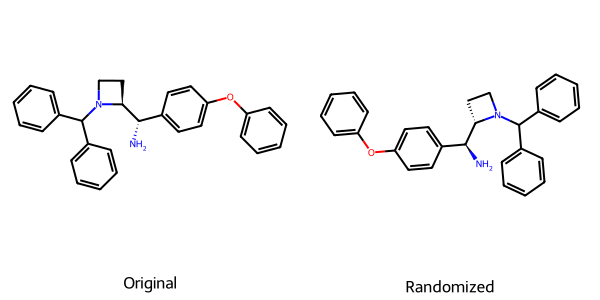

In [9]:
# display the molecules
from rdkit.Chem import Draw
m1 = Chem.MolFromSmiles(original_smi)
m2 = Chem.MolFromSmiles(randomized_smi)
img = Draw.MolsToGridImage([m1, m2], molsPerRow=2, subImgSize=(300, 300),
                           legends=['Original', 'Randomized'])
img